# Predicting medical expenses

## USA patients demographic information
### Uses the dataset *medical_expenses.csv*

This notebook is an example. It does not show an exhaustive detail on all CRISP-DM phases.

(c) Nuno António 2020-2023 - Rev. 1.04

### Dataset description
Simulated dataset containing medical expenses for patients in the United States. These data were created for the book "Machine Learning with R" (Lantz, B., 2013) using demographic statistics from the U.S. Census Bureau.<br>
The variables included in this dataset are:<br>
- **age**: integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- **sex**: policy holder's gender, either male or female.
- **bmi**: body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- **children**: integer indicating the number of children / dependents covered by the insurance plan.
- **smoker**: yes or no depending on whether the insured regularly smokes tobacco.
- **region**: beneficiary's place of residence in the U.S., divided into four geographic regions: northeast, southeast, southwest, or northwest.
- **charges**: the total medical expenses charged to the plan for the calendar year.

<font color='blue'>Q1: From these variables which should be the target variable?</font>

### Initial setup and modules/packages loading

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

### Data understanding

In [2]:
# Load data 
ds = pd.read_csv('medical_expenses.csv', sep=',')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Display top 15 rows
ds.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Summary statistics
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
# Summary statistics for all variables - Transpose
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<font color='blue'>Q2: Do numeric variables statistics show any strange patterns?</font>

In [6]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# Transform a list of columns to categorical
cols = ['sex', 'smoker', 'region']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))

In [8]:
# Counts per category level
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
# Ckeck the top counts of all categorical variables
categorical=ds.select_dtypes(exclude=["number","bool_","object_"]).columns.tolist()
categorical
for var in ds[categorical]:
    print(var,":\n",ds[var].value_counts(), sep="")

sex:
male      676
female    662
Name: sex, dtype: int64
smoker:
no     1064
yes     274
Name: smoker, dtype: int64
region:
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [10]:
# Exploration of categorical variables: cross table of region and smoker
tb1 = pd.crosstab(index=ds['region'], columns=ds['smoker'])
tb1

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot:xlabel='region'>

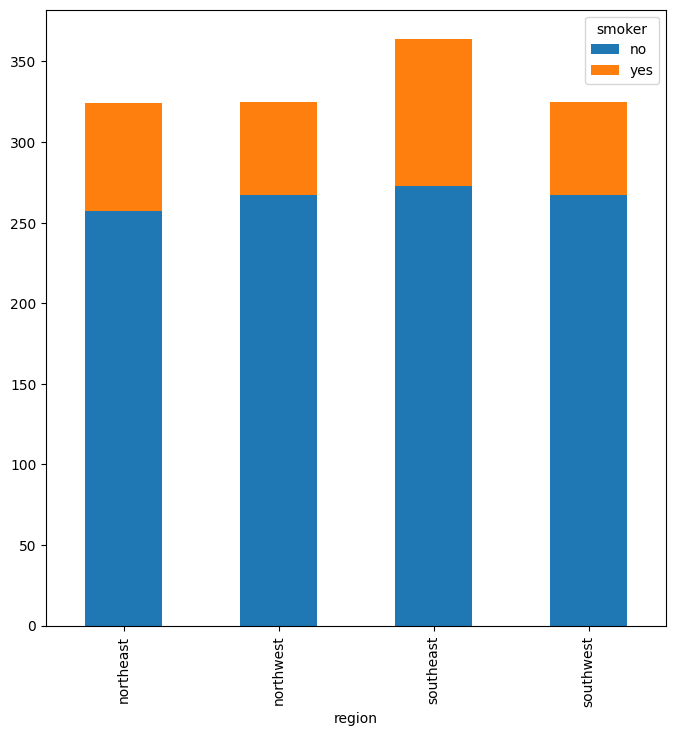

In [11]:
# Visual exploration of the cross table
tb1.plot(kind="bar", figsize=(8,8), stacked=True)

<font color='blue'>Q3: Is there any pattern regarding region and smoking habits?<br>C1: Explore other categorical variables relationships</font>

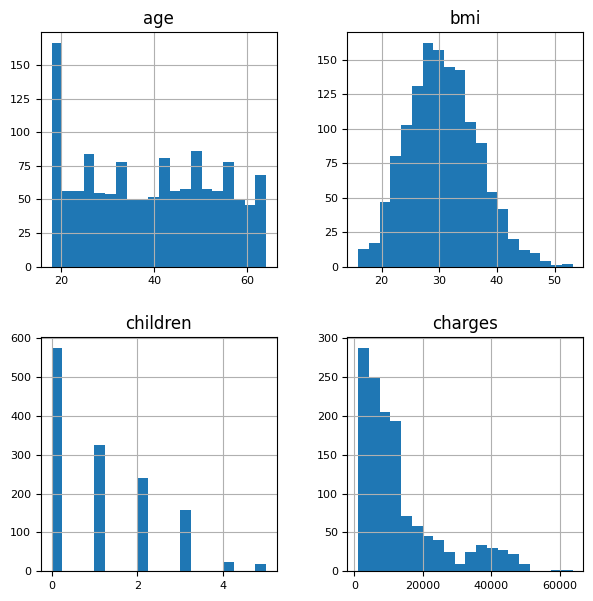

In [12]:
# Do histograms on all numeric variables
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(7, 7), layout=(2, 2), xlabelsize=8, ylabelsize=8);

<font color='blue'>Q4: What type of distributions are distributions problems are there?<br>C2: Explore histograms shapes with different bin sizes</font>

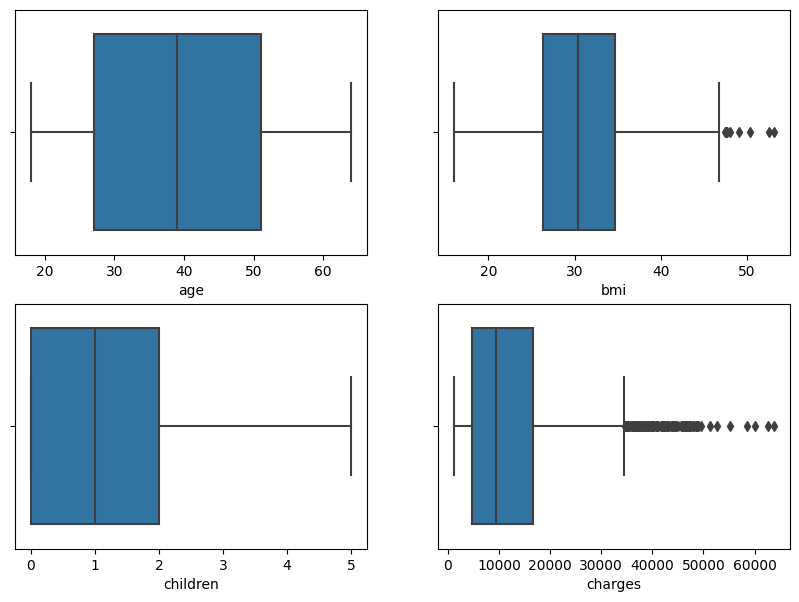

In [13]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)
    

<font color='blue'>Q5: Does the boxplots show any interesting patterns?</font>

/var/folders/3q/yw7kv53d5mlb0smm2tg9nkgr0000gn/T/ipykernel_66963/855079746.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


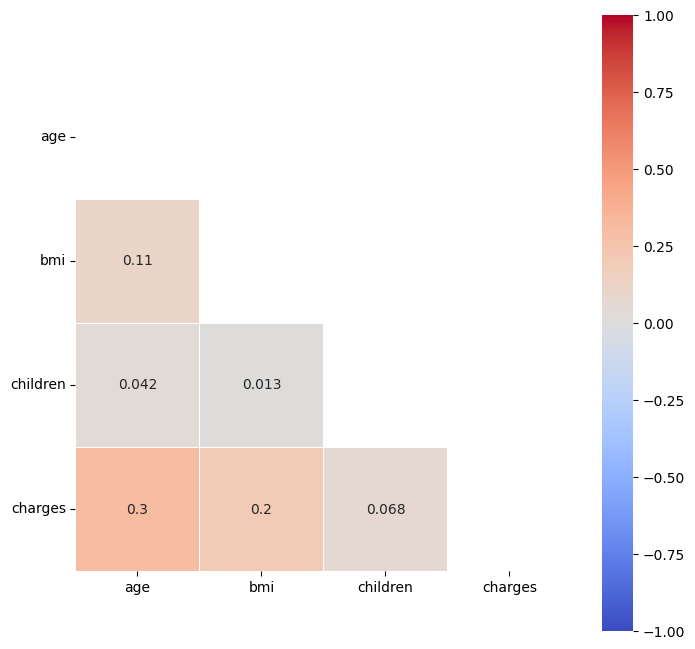

In [14]:
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#correct first and last line plot (bug on previous versions of Seaborn)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

<font color='blue'>Q6: Are there any relevant correlations?</font>

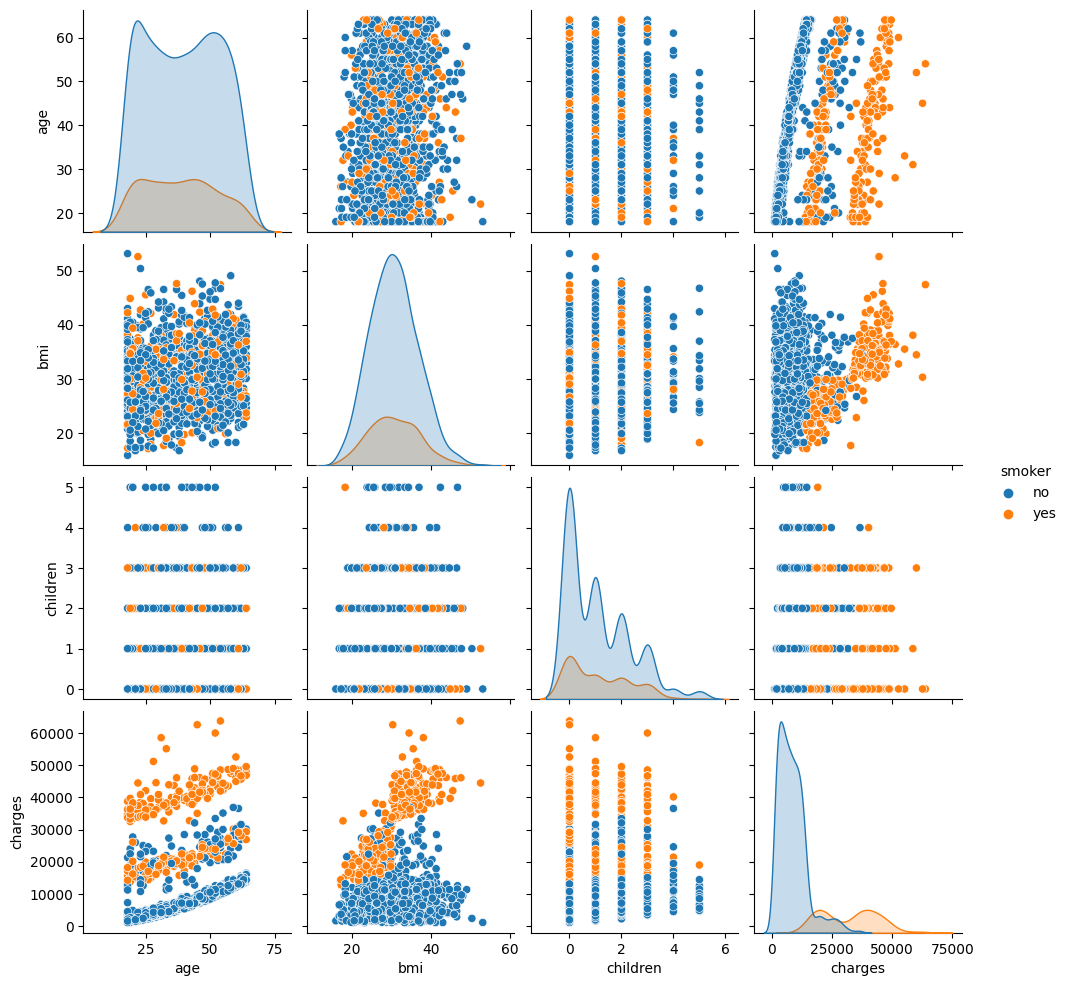

In [15]:
# Pair plot some of the numerical variables with Smoker
cols=['age','bmi','children','charges','smoker']
g = sns.pairplot(ds[cols], hue="smoker")

<font color='blue'>Q7: Are there any relevant patterns?</font><br>
<font color='blue'>C3: Change pairplot parameters to explore the relationship between other variables</font>